Arden Chaing

Phys 434

October 20, 2020

Lab3

In [113]:
# neccessary imports for the assignment
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pandas as pd
import PIL
from PIL import Image, ImageDraw, ImageFilter

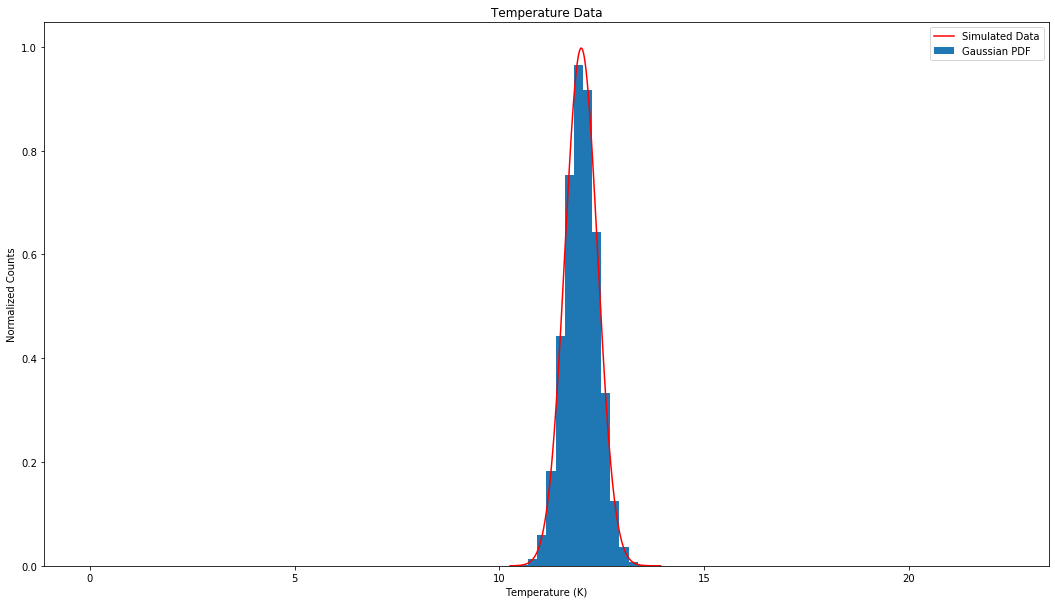

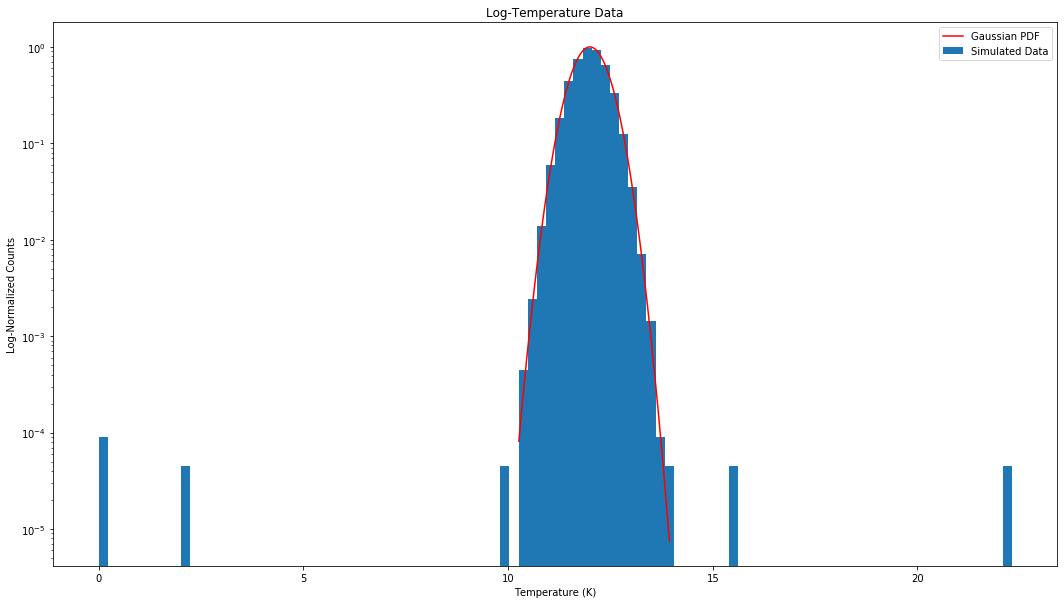

In [114]:
#1.A.1:
goodData = stats.norm.rvs(loc = 12, scale = 0.4, size = 100000)
badData = [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7]
x = np.linspace(goodData.min(), goodData.max(), 100000)
gpdf = stats.norm.pdf(x, loc=12, scale=0.4)
combo = np.append(goodData, badData)

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Gaussian PDF")
plt.plot(x, gpdf, c = 'r', label = "Simulated Data")
plt.title("Temperature Data")
plt.xlabel("Temperature (K)")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Simulated Data")
plt.plot(x, gpdf, c = 'r', label = "Gaussian PDF")
plt.yscale('log')
plt.title("Log-Temperature Data")
plt.xlabel("Temperature (K)")
plt.ylabel("Log-Normalized Counts")
plt.legend()
plt.show()

Problem 1.A.1: Above I have graphed the distribution of 100k good data points that hold a gaussian shape with a mean of 12 and a standard deviation of 0.4 with also the 8 bad data points given. In addition I overlayed a pure Gaussian distribution. However, seen in the log graph, there are several outliers in our data and therefore we must find a way to optimize our data; maximizing the "good" data while limiting the "bad" data. 

Problem 1.A.2: We expect a signal-free background to yield a Gaussian pdf with a mean of 12 and a standard deviation of 0.4. However, we run into outliers which don't represent our data. Which of the data points are significant enough to no longer be considered a product of the background?

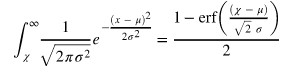

In [115]:
# 1.A.3:
Image.open('Lab3.1.jpg')

Problem 1.A.3: Using the equation above, we can take the integral from -infinity to -x and the integral from x to infintiy and set them equal to the probability of 5 sigma; since that's what we deem significant enough. This will yield what values of temperature are significant enough to be considered not created by the background. In order to find x we can utilize the equation (x-u)/(sigma). Therefore any temperature not in the range of 10-14 we can consider stastically significant enough to remove as bad data.

In [116]:
# 1.A.4: 
sigma=5
goodKept = goodData[np.where((goodData< 12+sigma*.4) & (goodData> 12-sigma*.4))]
goodDiscard = len(goodData) - len(goodKept)
badData = np.asarray(badData)
badKept = badData[np.where((badData>12-sigma*.4) & (badData<12+sigma*.4))]
badDiscard = len(badData) - len(badKept)
print('Sigma value:', sigma)
print('Pos True:', len(goodKept))
print('Pos False:', len(badKept))
print('Neg True:', badDiscard)
print('Neg False:', goodDiscard)

Sigma value: 5
Pos True: 100000
Pos False: 2
Neg True: 6
Neg False: 0


Problem 1.A.4: According to my truth table for a 5 sigma stastistical significance probability, we are keeping 2 bad data values and all the good data values. 

In [117]:
# 1.B:
for i in range(1,4): 
    goodKept = goodData[np.where((goodData< 12+i*.4) & (goodData> 12-i*.4))]
    goodDiscard = len(goodData) - len(goodKept)
    badData = np.asarray(badData)
    badKept = badData[np.where((badData>12-i*.4) & (badData<12+i*.4))]
    badDiscard = len(badData) - len(badKept)
    print('Sigma value:', i)
    print('Pos True:', len(goodKept))
    print('Pos False:', len(badKept))
    print('Neg True:', badDiscard)
    print('Neg False:', goodDiscard)
    print()


Sigma value: 1
Pos True: 68171
Pos False: 0
Neg True: 8
Neg False: 31829

Sigma value: 2
Pos True: 95451
Pos False: 1
Neg True: 7
Neg False: 4549

Sigma value: 3
Pos True: 99717
Pos False: 1
Neg True: 7
Neg False: 283



Problem 1.B: Above I reran the code with different sigma values and as you can see the larger the threshhold the less likely you are to throw away good data. This is because more data will meet the demands of our threshold as the tolerancesa relax. And these omissions are predictable since we are dealing with a gaussian distribution. We know that within 1, 2, and 3 standard deviations the percentage of data inside that range is 68%, 95%, and 99.7% respectively.

Problem 1.C: Yes, there can be mistakes of commission. In our example with 5 sigma we had two bad data points. However, they are avoidable by making the statistical threshold smaller. However, this comes at a price described in the answer above. If we decrease the threshold too much then we omit more good data. So finding a good balance between accepting good data and rejecting bad data will yield the most optimal threshold. 

Problem 2.1: With a gaussian distribution having a mean of 0 and a standard deviation of 1, what is the distance a potential asteriod must travel in order to distinguish itself by at at least 5 sigma from the bacgkround?

5 sigma probability: 2.866515719235352e-07


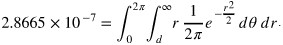

In [118]:
# 2.2: 
print('5 sigma probability:', str(1-stats.norm.cdf(5)))
Image.open('Lab3.2.jpg')

Problem 2.2: Above is the probability of 5 sigma for a normal gaussian distribution, which translates to the integral of the pdf from a value x out to infinity. Since we want to know the distance corresponding to 5 sigma, we should look for the bounding value x. Since we are looking radially in 2-d space this distance isn't too difficult to calculate. 

In [119]:
print("d =", 5.489)

d = 5.489


Problem 3.1: What is the probability that the background data produces 6800 or less comsmic rays in 15 days?

Problem 3.2: We need to fin dthe background pdf for a single minute then multiply that by 7200 minutes of observing the moon to get the proper background pdf. After that in order to get the probability we would observe 6800 or less counts of cosmic rays we would need to integrate the proper background pdf from negative infinity to 6800. After that we can calculate the sigma value corresponding to that for a standard normal distribution. There is a unique aspect in this scenario because we technically don't need to integrate from negative infinity to 6800. We could integrate from 0 sighting to 6800, since it's impossible to have negative sightings.

Question to math


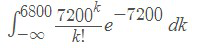

In [120]:
# 3.2:
print("Question to math")
Image.open('Lab3.3.jpg')

In [121]:
# 3.3: 
prob = np.abs(stats.poisson.cdf(6800, mu=7200))
sigma = stats.norm.ppf(prob)
print("Probability:", prob)
print("Sigma:", sigma)

Probability: 1.0133280183917768e-06
Sigma: -4.750747965777188


Problem 3.3: The significance of the measurement is 4.75 sigma.